In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [201]:
dataset = pd.read_csv('feature_vec/image_water_mark_dataset.txt')
dataset

,Unnamed: 0,bit,feature_1,feature_2,feature_3,feature_4
0,0,1.0,0.0,18.5,-5.0,1.5
1,1,0.0,-4.5,-33.5,-4.5,-42.0
2,2,1.0,10.5,91.5,5.5,87.0
3,3,0.0,-31.0,-5.5,-35.5,-5.5
4,4,1.0,-16.5,13.0,-11.0,-6.0
...,...,...,...,...,...,...
511995,511995,1.0,-6.5,3.0,-1.0,9.0
511996,511996,0.0,-3.5,0.5,0.5,-2.5
511997,511997,0.0,0.5,-8.0,0.5,-2.5
511998,511998,0.0,2.0,28.0,-2.0,28.0


In [202]:
dataset.dtypes

Unnamed: 0      int64
bit           float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
dtype: object

In [203]:
X = dataset.iloc[:,[2,3,4,5]].values
X

array([[  0. ,  18.5,  -5. ,   1.5],
       [ -4.5, -33.5,  -4.5, -42. ],
       [ 10.5,  91.5,   5.5,  87. ],
       ...,
       [  0.5,  -8. ,   0.5,  -2.5],
       [  2. ,  28. ,  -2. ,  28. ],
       [ 28. ,   3.5,  27.5,   9. ]])

In [204]:
X.dtype

dtype('float64')

In [205]:
y = dataset.iloc[:, 1].values
y

array([1., 0., 1., ..., 0., 0., 0.])

In [206]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state=None, shuffle=False)

In [207]:
y_train

array([1., 0., 1., ..., 0., 0., 0.])

In [208]:
y_train.size

51200

In [209]:
X_train

array([[  0. ,  18.5,  -5. ,   1.5],
       [ -4.5, -33.5,  -4.5, -42. ],
       [ 10.5,  91.5,   5.5,  87. ],
       ...,
       [ -4.5,  -7.5,  -5. ,  -5. ],
       [ -7. ,   6.5, -10. ,   7. ],
       [ -6. ,   7. ,   6.5,   5. ]])

In [210]:
X_train.size

204800

In [211]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes = (20,15,10,5) , max_iter=1000 ,early_stopping=True , verbose=True)
clf.fit(X_train, y_train)


Iteration 1, loss = 0.71114918
Validation score: 0.598633
Iteration 2, loss = 0.58013498
Validation score: 0.812109
Iteration 3, loss = 0.45902324
Validation score: 0.862305
Iteration 4, loss = 0.29501764
Validation score: 0.928125
Iteration 5, loss = 0.21365635
Validation score: 0.947656
Iteration 6, loss = 0.16997137
Validation score: 0.950391
Iteration 7, loss = 0.14825014
Validation score: 0.968750
Iteration 8, loss = 0.13426355
Validation score: 0.971680
Iteration 9, loss = 0.12700208
Validation score: 0.973242
Iteration 10, loss = 0.12057920
Validation score: 0.978320
Iteration 11, loss = 0.11377993
Validation score: 0.974414
Iteration 12, loss = 0.10832884
Validation score: 0.975000
Iteration 13, loss = 0.10527142
Validation score: 0.976758
Iteration 14, loss = 0.10094773
Validation score: 0.973437
Iteration 15, loss = 0.09780061
Validation score: 0.980859
Iteration 16, loss = 0.09481523
Validation score: 0.981641
Iteration 17, loss = 0.09030476
Validation score: 0.979492
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 15, 10, 5),
              max_iter=1000, verbose=True)

In [212]:
y_predict=clf.predict(X_test)
y_predict.size

460800

In [213]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
pd.DataFrame(cm)

,0,1
0,195004,2546
1,4232,259018


In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9852907986111111

In [215]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98    197550
         1.0       0.99      0.98      0.99    263250

    accuracy                           0.99    460800
   macro avg       0.98      0.99      0.99    460800
weighted avg       0.99      0.99      0.99    460800



d:\code\python\nir\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


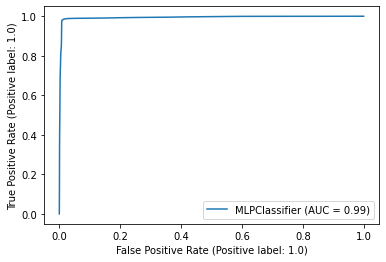

In [216]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(clf, X_test, y_test, cv=5, scoring='accuracy')

Iteration 1, loss = 0.33377452
Validation score: 0.973036
Iteration 2, loss = 0.11863364
Validation score: 0.983181
Iteration 3, loss = 0.09719075
Validation score: 0.985758
Iteration 4, loss = 0.08428692
Validation score: 0.985487
Iteration 5, loss = 0.07578808
Validation score: 0.986844
Iteration 6, loss = 0.06780191
Validation score: 0.987657
Iteration 7, loss = 0.06184039
Validation score: 0.987142
Iteration 8, loss = 0.05978355
Validation score: 0.988553
Iteration 9, loss = 0.05782843
Validation score: 0.988281
Iteration 10, loss = 0.05657050
Validation score: 0.987467
Iteration 11, loss = 0.05603915
Validation score: 0.983100
Iteration 12, loss = 0.05560055
Validation score: 0.988878
Iteration 13, loss = 0.05300902
Validation score: 0.987196
Iteration 14, loss = 0.05384916
Validation score: 0.988688
Iteration 15, loss = 0.05327915
Validation score: 0.986355
Iteration 16, loss = 0.05176137
Validation score: 0.989285
Iteration 17, loss = 0.05346227
Validation score: 0.979384
Iterat

Iteration 34, loss = 0.04453605
Validation score: 0.990940
Iteration 35, loss = 0.04368461
Validation score: 0.990940
Iteration 36, loss = 0.04396682
Validation score: 0.990316
Iteration 37, loss = 0.04415077
Validation score: 0.991265
Iteration 38, loss = 0.04372862
Validation score: 0.990858
Iteration 39, loss = 0.04417938
Validation score: 0.990370
Iteration 40, loss = 0.04362911
Validation score: 0.988878
Iteration 41, loss = 0.04341812
Validation score: 0.988281
Iteration 42, loss = 0.04289549
Validation score: 0.989692
Iteration 43, loss = 0.04298856
Validation score: 0.988797
Iteration 44, loss = 0.04386684
Validation score: 0.989556
Iteration 45, loss = 0.04250767
Validation score: 0.989610
Iteration 46, loss = 0.04285118
Validation score: 0.990804
Iteration 47, loss = 0.04262266
Validation score: 0.990913
Iteration 48, loss = 0.04245492
Validation score: 0.990099
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.

In [ ]:
scores

In [195]:
y_predict=y_predict[1024:2048]
y_pretict.size

0

In [196]:
y_predict[y_predict>0]=255

In [197]:
y_predict=y_predict.reshape(32,32)
y_predict

array([[255.,   0., 255., ..., 255., 255., 255.],
       [255.,   0., 255., ...,   0.,   0.,   0.],
       [255.,   0., 255., ...,   0.,   0.,   0.],
       ...,
       [255.,   0.,   0., ..., 255., 255.,   0.],
       [255.,   0.,   0., ...,   0.,   0.,   0.],
       [255.,   0.,   0., ...,   0.,   0., 255.]])

In [198]:
from PIL import Image
img = Image.fromarray(y_predict.astype(np.uint8))
img.show()
          